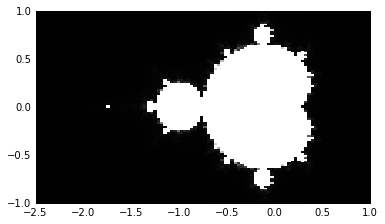

In [4]:
# Interactive version of the "Mandelbrot Set" - solution to challenge in 
# "Doing Math with Python", chapter 6
%matplotlib inline
'''
mandelbrot.py

Draw a Mandelbrot set

Using "Escape time algorithm" from:
http://en.wikipedia.org/wiki/Mandelbrot_set#Computer_drawings

Thanks to http://www.vallis.org/salon/summary-10.html for some important
ideas for implementation.

'''

from ipywidgets import interact
import ipywidgets as widgets


import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Subset of the complex plane we are considering
x0, x1 = -2.5, 1
y0, y1 = -1, 1

def initialize_image(x_p, y_p):
    image = []
    for i in range(y_p):
        x_colors = []
        for j in range(x_p):
            x_colors.append(0)
        image.append(x_colors)
    return image

def mandelbrot_set(n, max_iterations):
    image = initialize_image(n, n)
    
    # Generate a set of equally spaced points in the region
    # above
    dx = (x1-x0)/(n-1)
    dy = (y1-y0)/(n-1)
    x_coords = [x0 + i*dx for i in range(n)]
    y_coords = [y0 + i*dy for i in range(n)]

    for i, x in enumerate(x_coords):
        for k, y in enumerate(y_coords):
            z1 = complex(0, 0)
            iteration = 0
            c = complex(x, y)
            while (abs(z1) < 2  and iteration < max_iterations):
                z1 = z1**2 + c
                iteration += 1
            image[k][i] = iteration
    return image

def draw_mandelbrot(n, max_iterations):
    image = mandelbrot_set(n, max_iterations)
    plt.imshow(image, origin='lower', extent=(x0, x1, y0,y1),
               cmap=cm.Greys_r, interpolation='nearest')
    plt.show()
    

# Allow interaction via the interact() function and an Integer slider widget
i = interact(draw_mandelbrot, 
             n=widgets.IntSlider(min=100, max=600,step=1,value=10), 
             max_iterations=widgets.IntSlider(min=100, max=10000,step=1,value=10),
             # This keyword argument adds a button so that the drawing happens
             # only when the button is clicked
             __manual=True
             )